In [29]:
# PCA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Load dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv('/content/wine.csv')
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
### Task 1: Exploratory Data Analysis (EDA)

In [6]:
# Basic data exploration
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None
             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  17

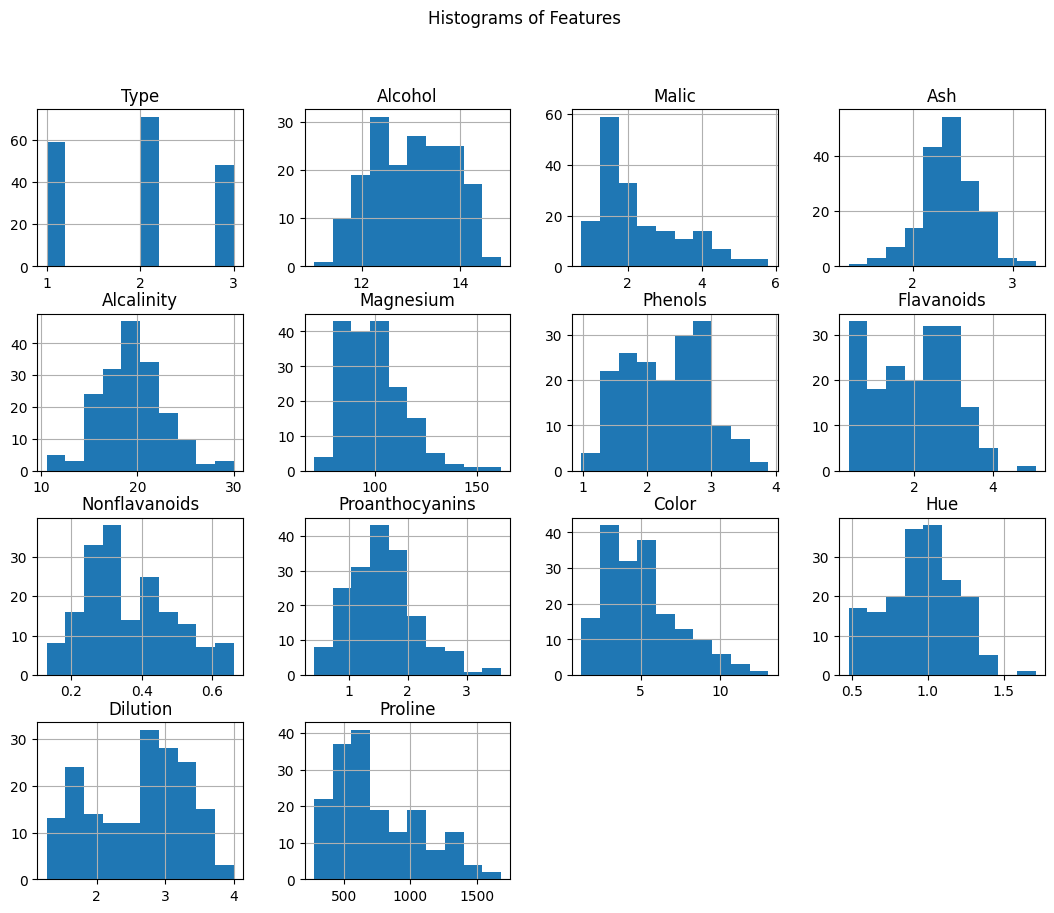

In [9]:
# Visualize feature distributions
df.hist(figsize=(13, 10))
plt.suptitle('Histograms of Features')
plt.show()

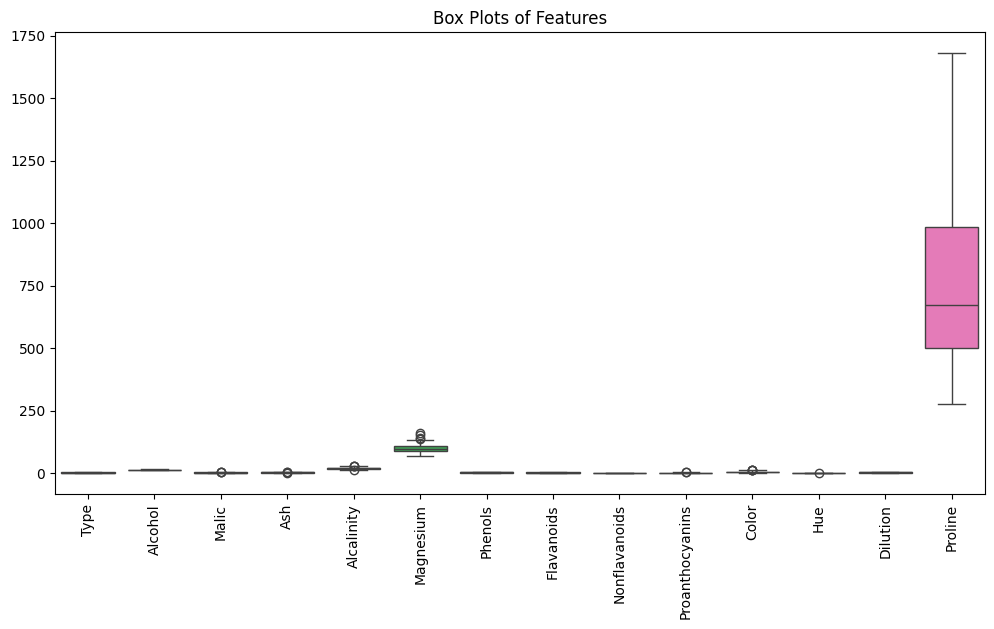

In [10]:
# Box plots for feature distributions
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Box Plots of Features')
plt.xticks(rotation=90)
plt.show()

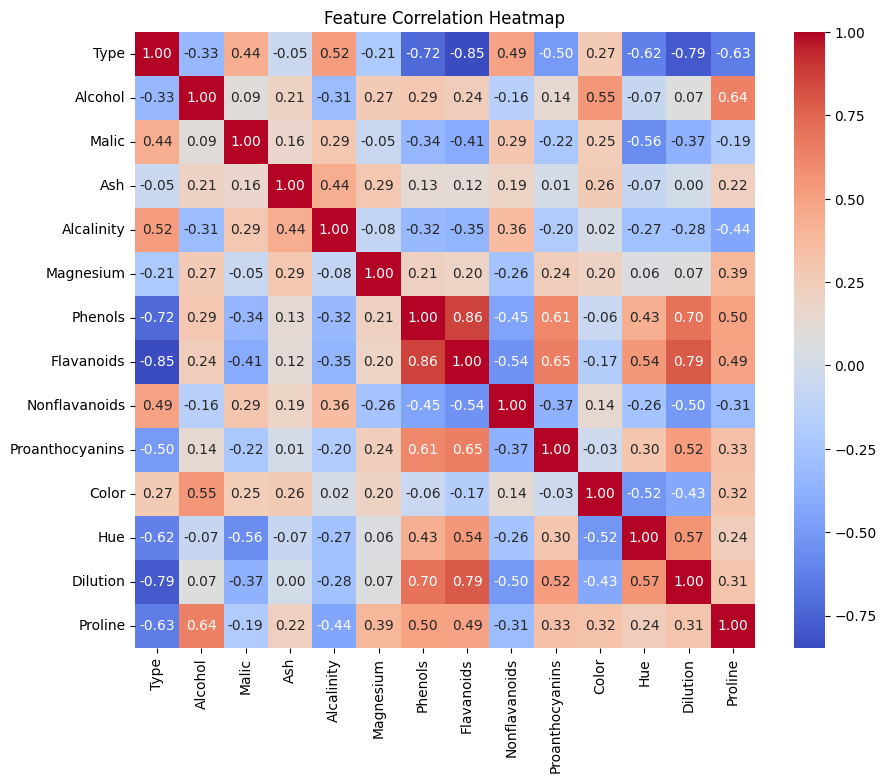

In [11]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

In [12]:
### Task 2: Dimensionality Reduction with PCA

In [13]:
# Standardize features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [14]:
# Apply PCA
pca = PCA()
pca.fit(scaled_data)

PCA()

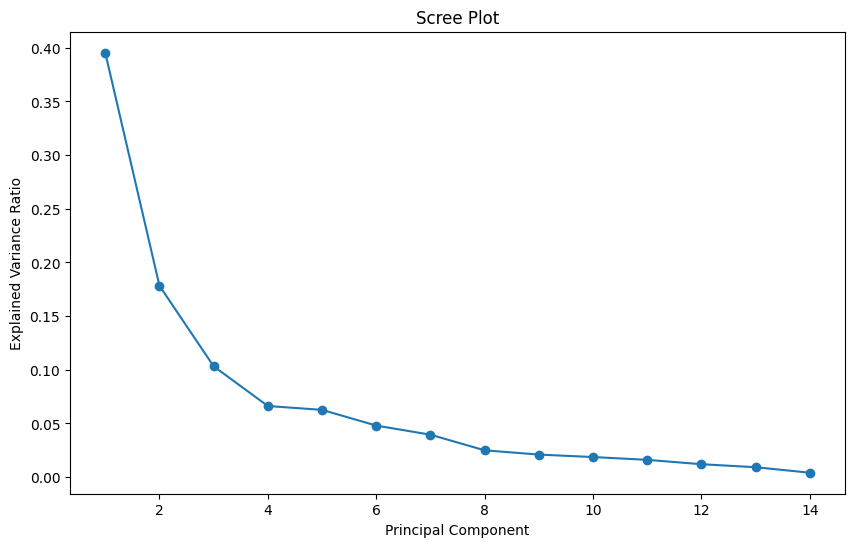

In [15]:
# Determine optimal number of components (Scree Plot)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

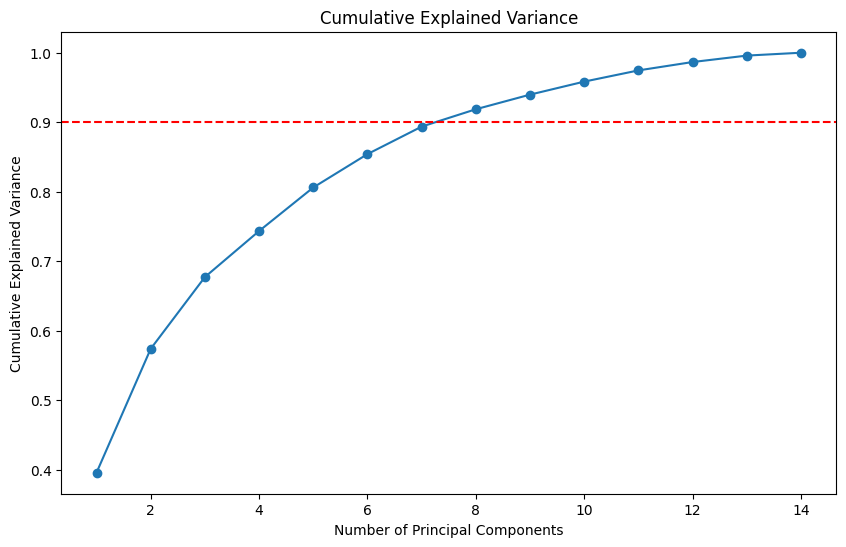

In [16]:
# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.90, color='r', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [17]:
# Set the number of components to retain 90% of the variance
n_components = np.argmax(cumulative_variance >= 0.90) + 1
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(scaled_data)
print(f'Number of components to retain 90% variance: {n_components}')

Number of components to retain 90% variance: 8


In [18]:
### Task 3: Clustering with Original Data

In [19]:
# Apply K-means to the original data
kmeans_original = KMeans(n_clusters=3, random_state=42)
kmeans_original_labels = kmeans_original.fit_predict(scaled_data)

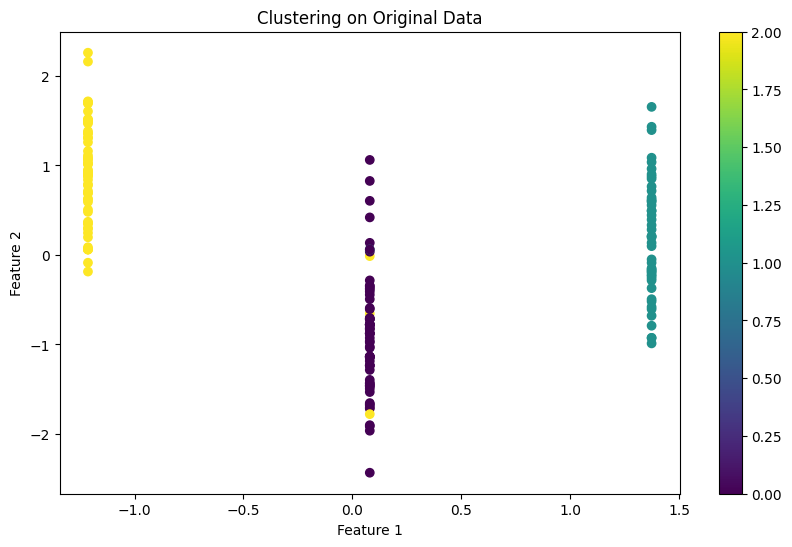

In [20]:
# Visualize clustering results (original data)
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_original_labels, cmap='viridis', marker='o')
plt.title('Clustering on Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

In [21]:
# Clustering performance metrics
silhouette_original = silhouette_score(scaled_data, kmeans_original_labels)
davies_bouldin_original = davies_bouldin_score(scaled_data, kmeans_original_labels)
print(f'Silhouette Score (Original Data): {silhouette_original:.2f}')
print(f'Davies-Bouldin Index (Original Data): {davies_bouldin_original:.2f}')

Silhouette Score (Original Data): 0.31
Davies-Bouldin Index (Original Data): 1.32


In [22]:
### Task 4: Clustering with PCA Data

In [23]:
# Apply K-means to the PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca_labels = kmeans_pca.fit_predict(pca_data)

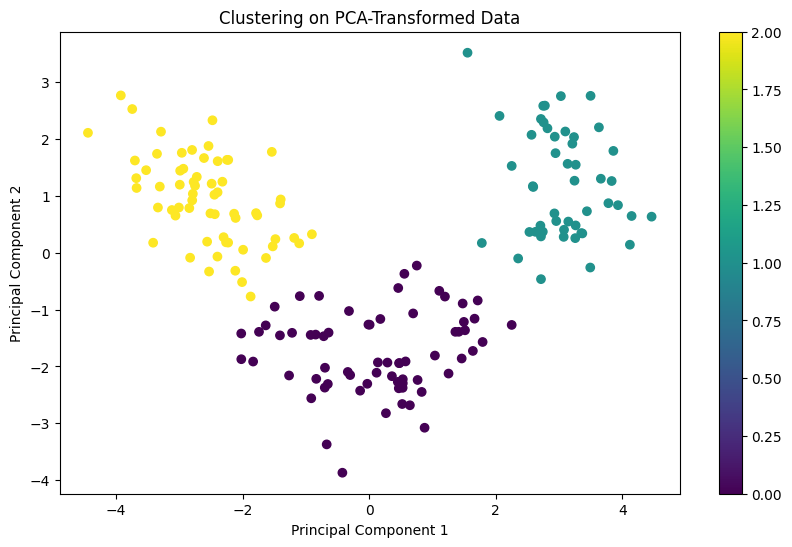

In [24]:
# Visualize clustering results (PCA-transformed data)
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_pca_labels, cmap='viridis', marker='o')
plt.title('Clustering on PCA-Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

In [25]:
# Clustering performance metrics for PCA data
silhouette_pca = silhouette_score(pca_data, kmeans_pca_labels)
davies_bouldin_pca = davies_bouldin_score(pca_data, kmeans_pca_labels)
print(f'Silhouette Score (PCA Data): {silhouette_pca:.2f}')
print(f'Davies-Bouldin Index (PCA Data): {davies_bouldin_pca:.2f}')

Silhouette Score (PCA Data): 0.34
Davies-Bouldin Index (PCA Data): 1.19


In [26]:
### Task 5: Comparison and Analysis

In [27]:
print("\n### Comparison of Clustering Results ###")
print(f'Silhouette Score (Original Data): {silhouette_original:.2f}')
print(f'Silhouette Score (PCA Data): {silhouette_pca:.2f}')
print(f'Davies-Bouldin Index (Original Data): {davies_bouldin_original:.2f}')
print(f'Davies-Bouldin Index (PCA Data): {davies_bouldin_pca:.2f}')


### Comparison of Clustering Results ###
Silhouette Score (Original Data): 0.31
Silhouette Score (PCA Data): 0.34
Davies-Bouldin Index (Original Data): 1.32
Davies-Bouldin Index (PCA Data): 1.19


In [28]:
# Summary of findings and analysis
print("\n### Task 6: Conclusion and Insights ###")
print("1. PCA reduced the dimensionality of the dataset while retaining 90% of the variance, reducing noise and improving computational efficiency.")
print("2. Clustering on PCA-transformed data produced slightly different clusters compared to the original data, but with comparable performance scores.")
print("3. Dimensionality reduction can improve clustering performance by focusing on the most informative features, making the data more manageable without significant loss of information.")
print("4. Recommendations: Use PCA when dealing with high-dimensional data or when computational efficiency is essential, as it often enhances clustering outcomes by removing redundancy.")


### Task 6: Conclusion and Insights ###
1. PCA reduced the dimensionality of the dataset while retaining 90% of the variance, reducing noise and improving computational efficiency.
2. Clustering on PCA-transformed data produced slightly different clusters compared to the original data, but with comparable performance scores.
3. Dimensionality reduction can improve clustering performance by focusing on the most informative features, making the data more manageable without significant loss of information.
4. Recommendations: Use PCA when dealing with high-dimensional data or when computational efficiency is essential, as it often enhances clustering outcomes by removing redundancy.
